In [6]:
import pandas as pd

data =r"C:\Users\WINDOWS 10\PycharmProjects\JupyterProject\data\data jupyter\pima_diabetes.csv"
df =pd.read_csv(data)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunct  Age  Outcome  
0                  0.627   50        1  
1                  0.351   31        0  
2                  0.672   32        1  
3                  0.167   21        0  
4                  2.288   33        1  


In [7]:
df.info()
df.describe()
df.isnull()
df.isnull().sum()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pregnancies            768 non-null    int64  
 1   Glucose                768 non-null    int64  
 2   BloodPressure          768 non-null    int64  
 3   SkinThickness          768 non-null    int64  
 4   Insulin                768 non-null    int64  
 5   BMI                    768 non-null    float64
 6   DiabetesPedigreeFunct  768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Outcome                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunct', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.isnull().sum()

Pregnancies              0
Glucose                  0
BloodPressure            0
SkinThickness            0
Insulin                  0
BMI                      0
DiabetesPedigreeFunct    0
Age                      0
Outcome                  0
dtype: int64

In [9]:
x = df.drop('Outcome', axis=1)
y = df['Outcome']
print(x.shape,y.shape)

(768, 8) (768,)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print(x_train.shape,x_test.shape)

(614, 8) (154, 8)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [13]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nConfusion Metrics : \n",classification_report(y_test,y_pred))
print("\nClassification Report : \n",classification_report(y_test,y_pred))

Accuracy:  0.7142857142857143

Confusion Metrics : 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n",classification_report(y_test,y_pred))

Accuracy:  0.7922077922077922

Confusion Matrix : 
 [[84 16]
 [16 38]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
rf = RandomForestClassifier(n_estimators=100,random_state=42, max_depth=5)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random forest Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report : \n",classification_report(y_test,y_pred_rf))

Random forest Accuracy:  0.7272727272727273

Confusion Matrix : 
 [[85 15]
 [27 27]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Try different max_depth values
depths = [2, 3, 4, 5, 6, 8, 10]

best_acc = 0
best_depth = None

for d in depths:
    model = DecisionTreeClassifier(
        random_state=42,
        max_depth=d
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
print("Tree Accuracy: ",accuracy_score(y_test,y_pred_rf))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred_rf))
print("\nClassification Report : \n",classification_report(y_test,y_pred_rf))


Tree Accuracy:  0.7272727272727273

Confusion Matrix : 
 [[85 15]
 [27 27]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(random_state=42)

# Hyperparameters to try
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(x_train, y_train)
best_dt = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
y_pred_best = best_dt.predict(x_test)
print("\nBest Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

Best Model Accuracy: 0.6948051948051948

Confusion Matrix:
 [[92  8]
 [39 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.92      0.80       100
           1       0.65      0.28      0.39        54

    accuracy                           0.69       154
   macro avg       0.68      0.60      0.59       154
weighted avg       0.68      0.69      0.65       154



In [18]:
import pandas as pd
importance = best_dt.feature_importances_
features = x.columns

imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

imp_df.head(5)


,Feature,Importance
1,Glucose,0.75587
5,BMI,0.24413
2,BloodPressure,0.00000
0,Pregnancies,0.00000
3,SkinThickness,0.00000


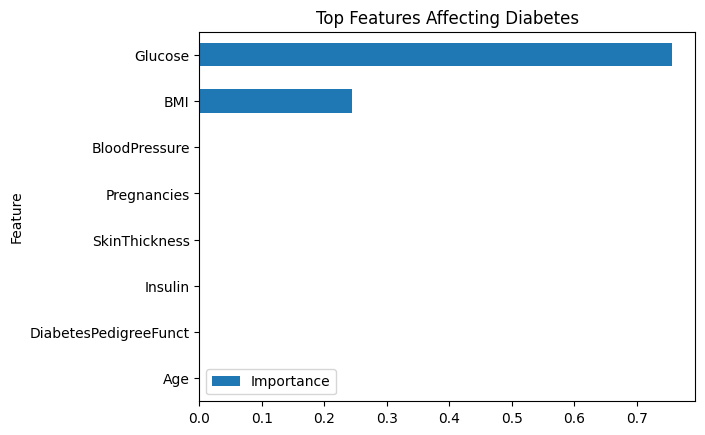

In [19]:
import matplotlib.pyplot as plt

imp_df.head(8).plot(kind='barh', x='Feature', y='Importance')
plt.gca().invert_yaxis()
plt.title("Top Features Affecting Diabetes")
plt.show()
